In [2]:
%%bash
pip install -U 'chitra'

In [5]:
import json
from pathlib import Path


from chitra.image import Chitra
import matplotlib.pyplot as plt

from chitra.coordinates import BoundingBoxes

ModuleNotFoundError: No module named 'chitra.coordinates'

In [2]:
base_path = Path('/run/media/amir/hard/Dataset/Kvasir-SEG/')
json_file=Path(base_path / 'kvasir-coco.json')
content=json.loads(json_file.read_text())

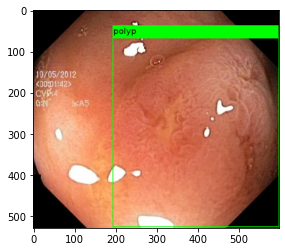

In [130]:
index = 15
my_image = content['images'][index]['file_name']
my_image_path = base_path / 'images' / my_image

bbox = []
labels = []
for i in range(len(content['annotations'])):
    if content['annotations'][i]['image_id'] == index:
        xmin,ymin,width,height = content['annotations'][i]['bbox']
        bbox.append([xmin,ymin,xmin+width,ymin+height])
        labels.append('polyp')
            
image = Chitra(str(my_image_path),bboxes = bbox,labels=labels)
plt.imshow(image.draw_boxes())

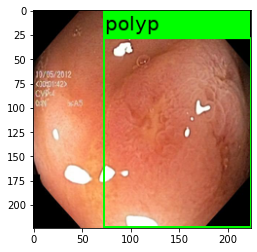

In [131]:
new_image,bbox_new_list=image.resize_image_with_bbox((224, 224))
bbox = []
labels = []
for item in bbox_new_list:
    bbox.append([item.x1,item.y1,item.x2,item.y2])
    labels.append(item.label)

plt.imshow((Chitra(new_image,bbox,labels)).draw_boxes())

['a', 'a', 'a', 'a', 'a']